# DAT210x - Programming with Python for DS

## Module4- Lab1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

In [2]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Every `100` samples in the dataset, we save `1`. If things run too slow, try increasing this number. If things run too fast, try decreasing it... =)

In [10]:
reduce_factor = 10

Load up the scanned armadillo:

In [11]:
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

In [16]:
print(armadillo.info())
print("")
armadillo.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17298 entries, 0 to 17297
Data columns (total 3 columns):
x    17298 non-null >f4
y    17298 non-null >f4
z    17298 non-null >f4
dtypes: float32(3)
memory usage: 202.8 KB
None



,x,y,z
0,27.283239,5.894578,11.788401
1,-57.618469,-52.965549,67.514847
2,-57.432579,-51.996799,67.937584
3,-57.352032,-52.848152,66.670273
4,10.742151,16.615034,-33.262657


### PCA

In the method below, write code to import the libraries required for PCA.

Then, train a PCA model on the passed in `armadillo` dataframe parameter. Lastly, project the armadillo down to the two principal components, by dropping one dimension.

**NOTE-1**: Be sure to RETURN your projected armadillo rather than `None`! This projection will be stored in a NumPy NDArray rather than a Pandas dataframe. This is something Pandas does for you automatically =).

**NOTE-2**: Regarding the `svd_solver` parameter, simply pass that into your PCA model constructor as-is, e.g. `svd_solver=svd_solver`.

For additional details, please read through [Decomposition - PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [20]:
def do_PCA(armadillo, svd_solver):
    # .. your code here ..
    from sklearn.decomposition import PCA
    X = armadillo
    pca = PCA(n_components=2, svd_solver=svd_solver)
    pca.fit(X)
    armadillo_PCA = pd.DataFrame(pca.transform(X))
    
    return armadillo_PCA

### Preview the Data

<IPython.core.display.Javascript object>


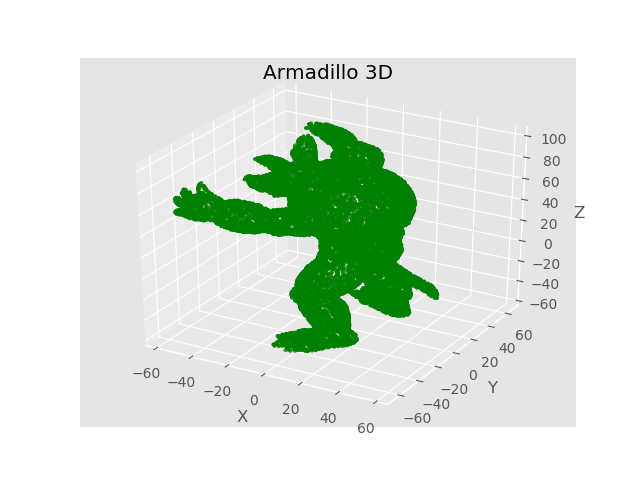

In [35]:
# Render the Original Armadillo
%matplotlib notebook
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

### Time Execution Speeds

Let's see how long it takes PCA to execute:

In [22]:
%timeit pca = do_PCA(armadillo, 'full')

1.45 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
pca = do_PCA(armadillo, 'full')
pca

,0,1
0,24.786949,-11.655438
1,-48.065911,58.738102
2,-48.476186,57.762176
3,-47.188549,58.570493
4,63.261135,-21.062688
5,42.239004,-22.060291
6,-48.873861,58.143325
7,24.714341,-12.492761
8,-47.532122,57.473732
9,78.086561,25.956173


Render the newly transformed PCA armadillo!

<IPython.core.display.Javascript object>


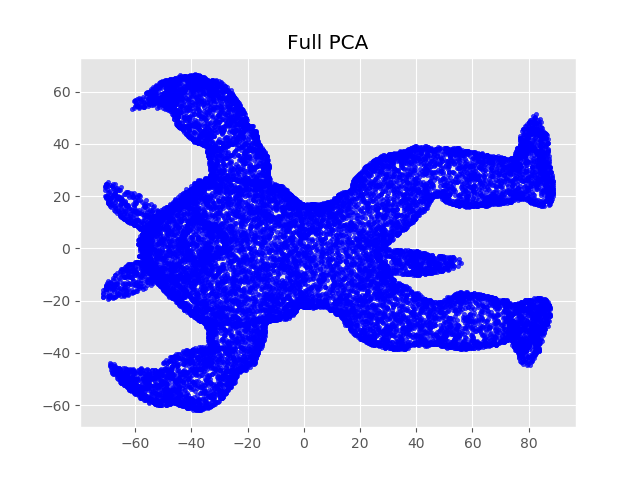

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Full PCA')
ax.scatter(pca[0], pca[1], c='blue', marker='.', alpha=0.75)
plt.show()

Let's also take a look at the speed of the randomized solver on the same dataset. It might be faster, it might be slower, or it might take exactly the same amount of time to execute:

In [31]:
%timeit rpca = do_PCA(armadillo, 'randomized')

8.83 ms ± 99.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Let's see what the results look like:

<IPython.core.display.Javascript object>


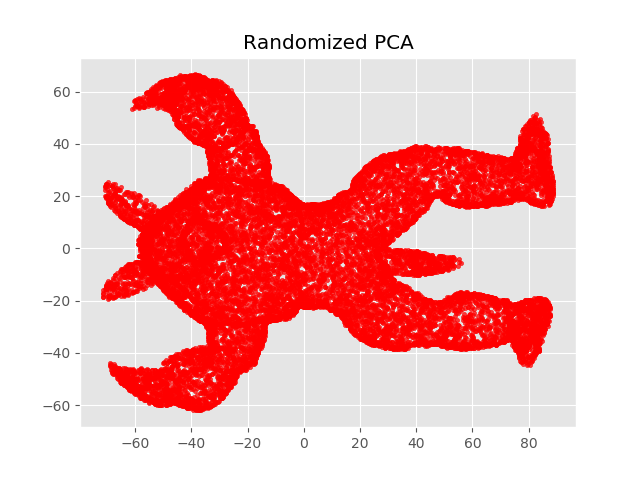

In [34]:
rpca = do_PCA(armadillo, 'randomized')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Randomized PCA')
ax.scatter(rpca[0], rpca[1], c='red', marker='.', alpha=0.75)
plt.show()